In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colors as colors
import Q2Q1FEM
import Q2Q1OPT
import PolyFEM
import pandas as pd 
import itertools
from copy import deepcopy
import amplify
from amplify import BinaryPoly, gen_symbols,sum_poly, decode_solution
from amplify import Solver
from amplify.client import FixstarsClient
token = "AE/1WaScy7jya1I2su6uQKSd0z0L11wAY0D "
import time

In [6]:
nelx=48
nely=32
left,right,wid,spa = 5/6,5/6,1/6,1/3
Node,Element,NodeBC = Q2Q1OPT.TwoSquareMeshQ2(nelx,nely,left,right,wid,spa)
Node_P,Element_P,NodeBC_P = Q2Q1OPT.TwoSquareMeshQ1(nelx,nely,left,right,wid,spa)
fem_NElem = Element.shape[0]
zIni = np.ones(fem_NElem)

In [7]:
adj_elem_list = []
for i in range(fem_NElem):
    t_adj = []
    if i%nely!=0:
        t_u = i-1
        t_adj.append(t_u)
    if i>=nely:
        t_l = i-nely
        t_adj.append(t_l)
    if i%nely!=nely-1:
        t_o = i+1
        t_adj.append(t_o)
    if (nelx*nely)-i>nely:
        t_r = i+nely
        t_adj.append(t_r)
    adj_elem_list.append(t_adj)

In [8]:
def Construct_QUBO(Nelm,u,v,volfrac,num_bit_per,xc):
    ## bit string
    v_limited = volfrac*Nelm

    ## coef for porous resistivity
    coef_pr = 10**5/4
    coef_pr_pres = [0 for _ in range(Nelm)]

    ## coef for energy loss, eqn constraint, gradient energy, heviside function, boundary constraint, domain constraints
    alpha_el = 5
    alpha_eqn_c = 1
    alpha_ge = 10.0
    alpha_hev = 300.0
    alpha_bc = 1.0
    alpha_dc = 600.0

    ## qubit
    q = gen_symbols(BinaryPoly,Nelm,num_bit_per+1)

    ## objective function
    obj_func = BinaryPoly()

    ### energy loss
    for t_id in range(Nelm):
        coef_pr_e = (1-q[t_id][-1])*coef_pr
        t_uvec = u[t_id]/xc*2
        t_vvec = v[t_id]/xc*2
        obj_func += alpha_el*(coef_pr_e*(t_uvec*t_uvec+t_vvec*t_vvec) )

    ### gradient energy
    for t_id,t_q in enumerate(q):
        for tt_id in adj_elem_list[t_id]:
            phi_i = (sum_poly(t_q[:-1])/num_bit_per*2)-1
            phi_j = (sum_poly(q[tt_id][:-1])/num_bit_per*2)-1
            obj_func += alpha_ge/2*(phi_i-phi_j)**2

    ### boundary constraint
    # for t_id, t_q in enumerate(q):
    #     if t_id in in_bound_element+out_bound_element:
    #         obj_func += alpha_bc*((sum_poly(t_q[:-1])/num_bit_per*2)-1 -1)**2
    #     else:
    #         pass

    ### heviside function
    for t_id, t_q in enumerate(q):
        obj_func += alpha_hev*(sum_poly(t_q[:-1])/num_bit_per - t_q[-1])**2

    ### domaint constraints
    obj_func += alpha_dc*(sum_poly([t[-1] for t in q]) - v_limited)**2
    
    client = FixstarsClient()
    client.parameters.timeout = 1000   # タイムアウト X m秒
    client.token = token # ローカル環境で使用する場合は、Amplify AEのアクセストークンを入力してください
    client.parameters.outputs.duplicate = True  # 同じエネルギー値の解を列挙するオプション（解が複数個あるため）

    solver = Solver(client)
    # solver.sort_solution = False # 解をエネルギー順にソートしない
    # solver.client.parameters.outputs.sort = False # 解をエネルギー順にソートしない
    # solver.client.parameters.outputs.num_outputs = 0 # エネルギーの更新ごとに得られたすべての解をsolutionsに含める
    # d = {"sampling_time":[],"energy":[]} #履歴データを格納する
    result = solver.solve(obj_func)
    # for t, s in zip(solver.client_result.timing.time_stamps, result.solutions):
    #     if s.is_feasible:
    #         d["sampling_time"].append(t)
    #         d["energy"].append(s.energy)
    # number=solver.client_result.execution_parameters.num_iterations
    # print("Solved",flush=True)
    #print(d)

    solution = decode_solution(q, result[0].values)
    
    return solution

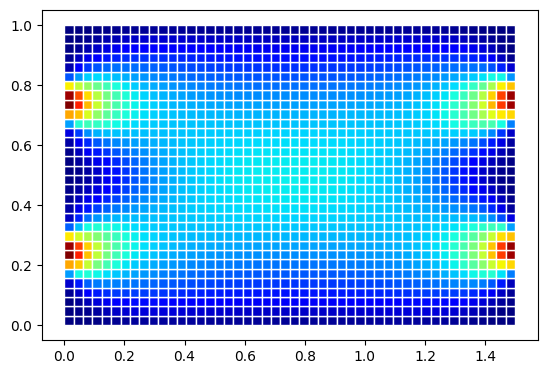

0.9179039509867533 0.00030617676560380644
--- 1th iteration ---


/var/folders/6f/zhj9bp0s0jd5c48blx7yjgdm0000gn/T/ipykernel_1124/1131901927.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 1167 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


0.0
Volume fraction: 0.4055989583333333


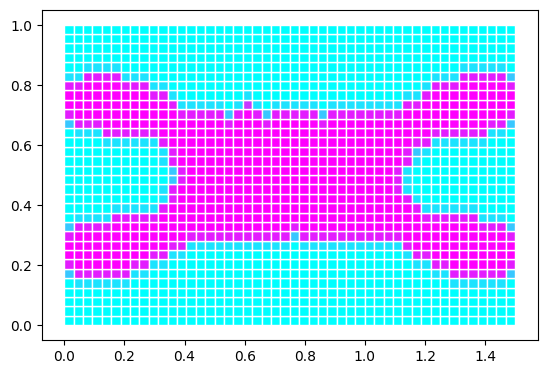

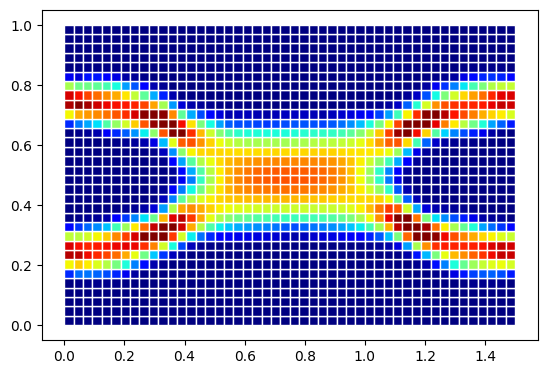

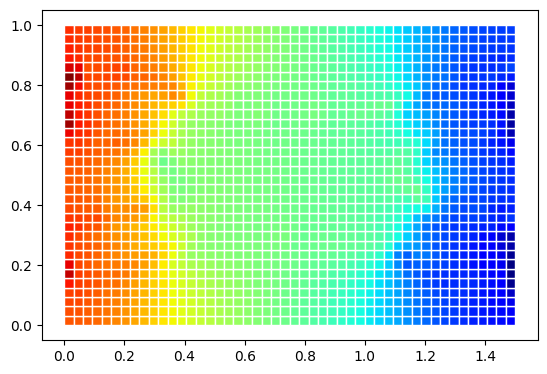

pressure: 3.481818598852475 -3.3173646175501794
--- 2th iteration ---


/var/folders/6f/zhj9bp0s0jd5c48blx7yjgdm0000gn/T/ipykernel_1124/1131901927.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 1151 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


0.0
Volume fraction: 0.4000289351851852


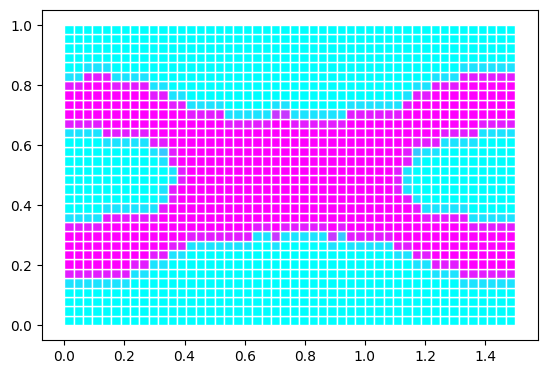

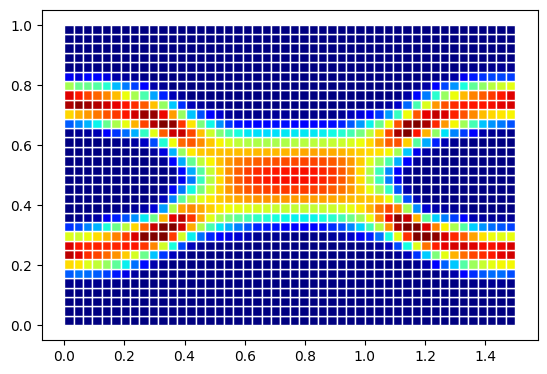

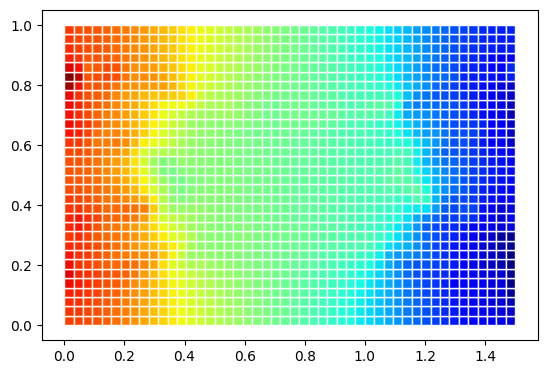

pressure: 3.1825905784000117 -2.898684816259762
--- 3th iteration ---


/var/folders/6f/zhj9bp0s0jd5c48blx7yjgdm0000gn/T/ipykernel_1124/1131901927.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 1148 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


0.0
Volume fraction: 0.40017361111111116


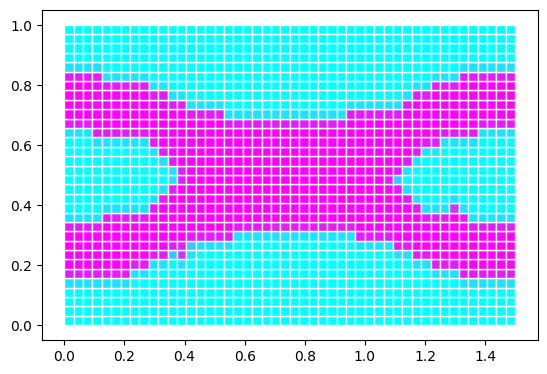

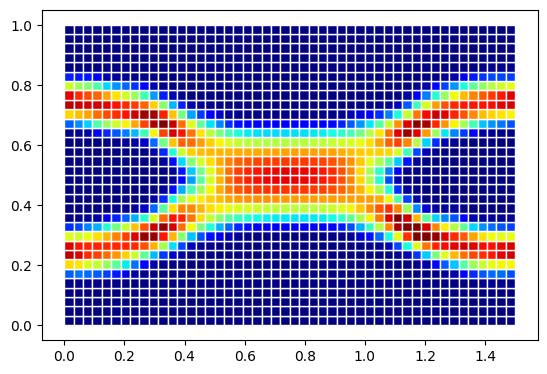

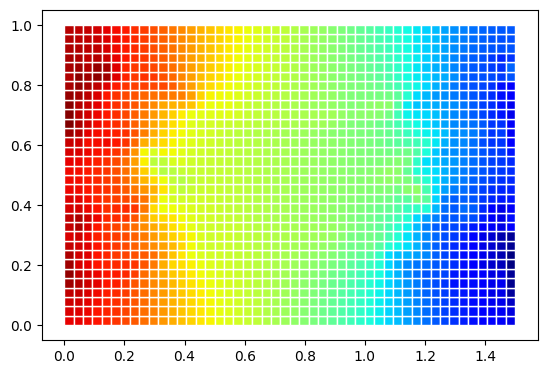

pressure: 2.4324772998504063 -2.8856520969666932
--- 4th iteration ---


/var/folders/6f/zhj9bp0s0jd5c48blx7yjgdm0000gn/T/ipykernel_1124/1131901927.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 1152 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


0.0
Volume fraction: 0.40031828703703703


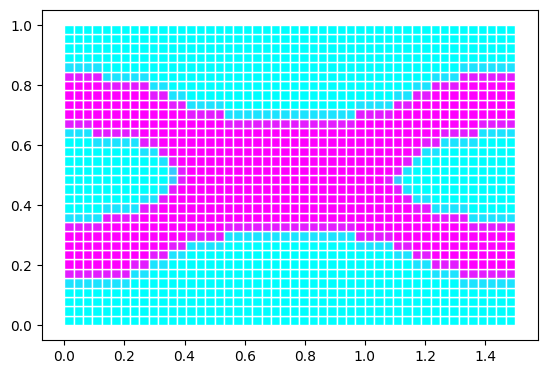

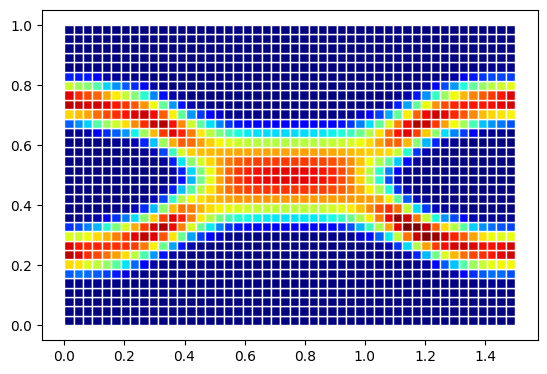

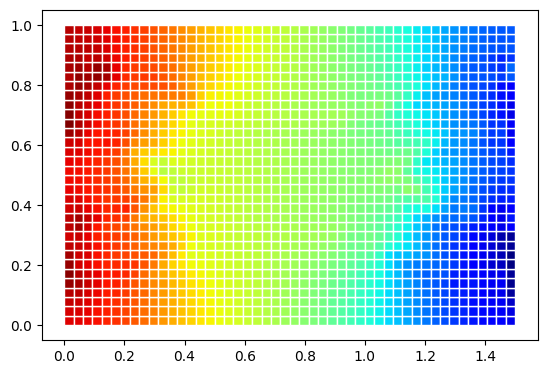

pressure: 2.283112836195522 -2.736312939057311
--- 5th iteration ---
0.0
Volume fraction: 0.40031828703703703


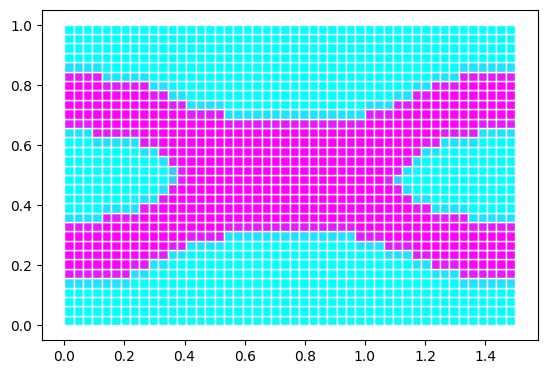

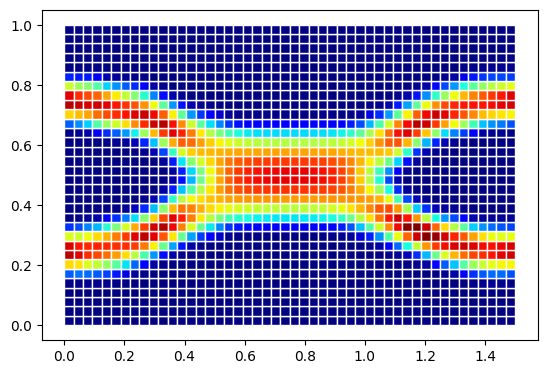

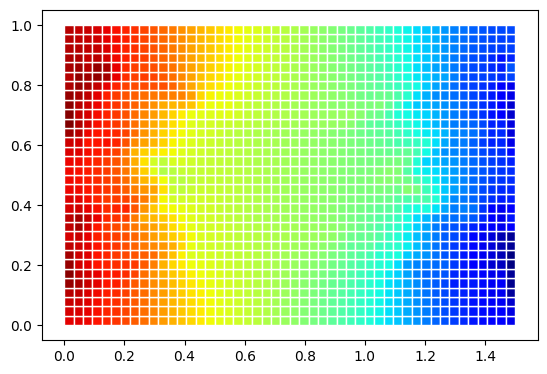

pressure: 2.273460636950994 -2.659289585079304
--- 6th iteration ---


/var/folders/6f/zhj9bp0s0jd5c48blx7yjgdm0000gn/T/ipykernel_1124/1131901927.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 1147 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


0.0
Volume fraction: 0.40031828703703703


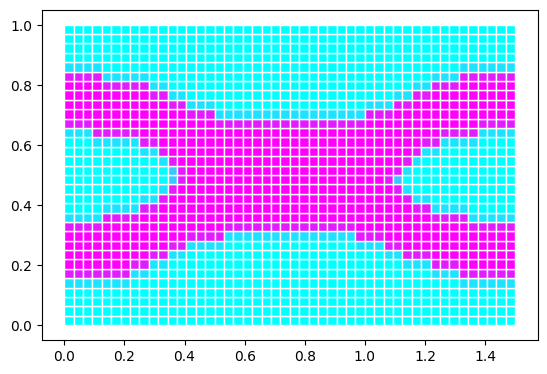

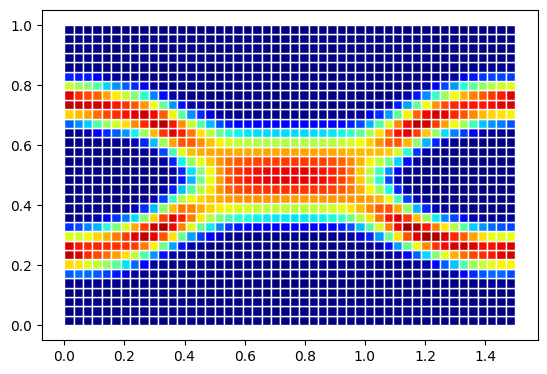

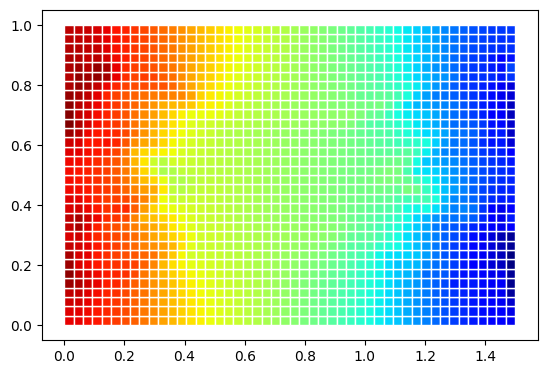

pressure: 2.280704618023892 -2.585121008203837
--- 7th iteration ---


/var/folders/6f/zhj9bp0s0jd5c48blx7yjgdm0000gn/T/ipykernel_1124/1131901927.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 1149 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


0.0
Volume fraction: 0.40031828703703703


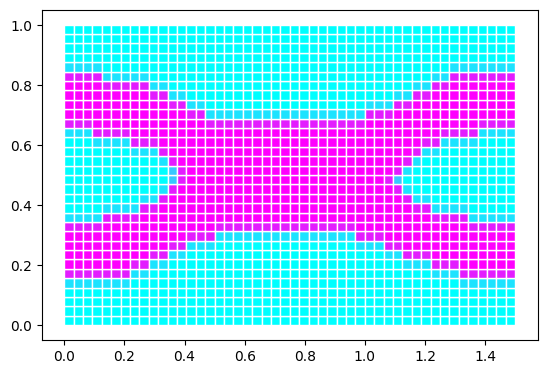

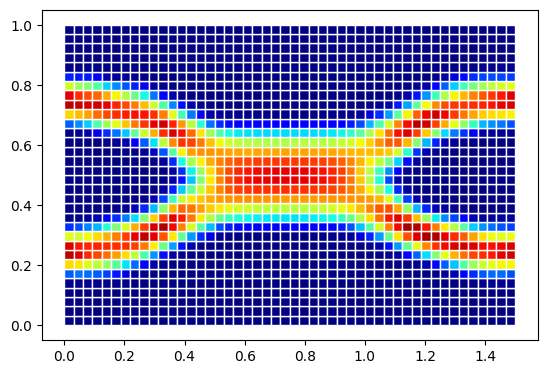

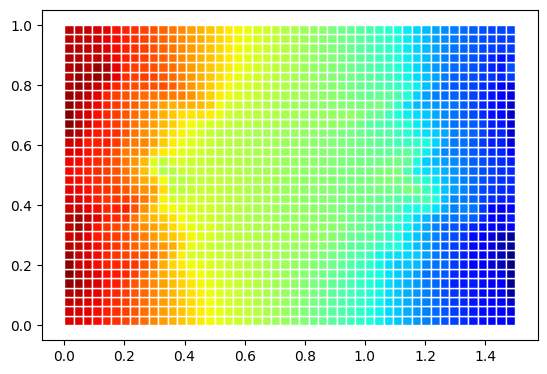

pressure: 2.2345319953008453 -2.5909685928150585
--- 8th iteration ---
0.0
Volume fraction: 0.40031828703703703


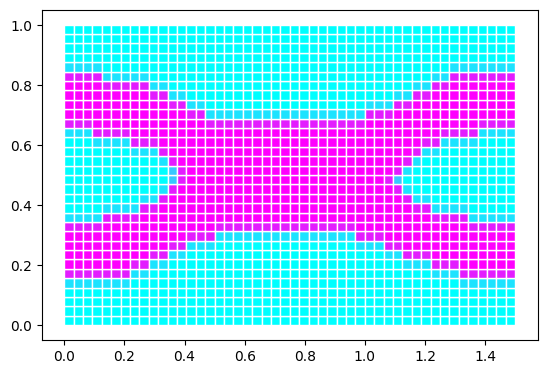

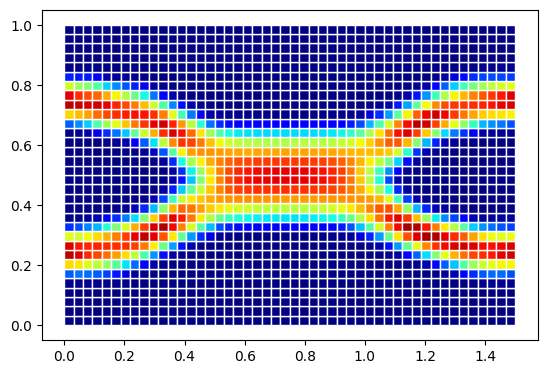

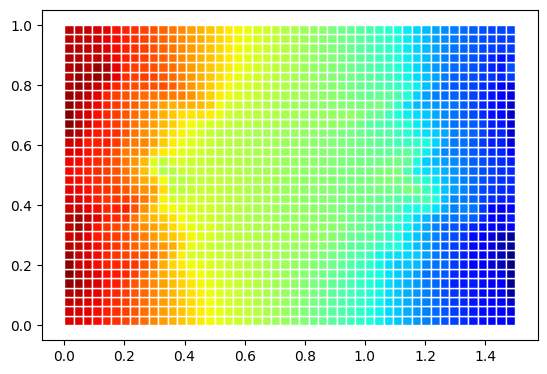

pressure: 2.2345319953008453 -2.5909685928150585
214.07132005691528


In [10]:
maxiter=15
num_bit_per = 9
nelm = 32

start = time.time()
p,f,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,zIni)
#p,f,u,v = Q2Q1FEM.Q2Q1FEM_PBC(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,zIni)
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),max(np.sqrt(u**2+v**2)),min(np.sqrt(u**2+v**2)),cmap='jet')
print(max(np.sqrt(u**2+v**2)),min(np.sqrt(u**2+v**2)))
#p,f,u,v = PolyFEM.PolyFEM(nelm,zIni)
z_QA_new = zIni
obj = []
frac = []
for i in range(maxiter):
    print('--- {}th iteration ---'.format(i+1))
    z_QA = z_QA_new
    # if i==0:
    #     xc = 2
    # else:
    #     xc = max(np.sqrt(u**2+v**2))
    xc = 2
    solution = Construct_QUBO(fem_NElem,u,v,volfrac=0.4,num_bit_per=num_bit_per,xc=xc)
    sol = []
    # heviside=[]
    # check=[]
    for t in solution:
        pred_t_d = np.sum(t[:-1])/num_bit_per
        sol.append(pred_t_d)
        # pred_t_h = t[-1]
        # heviside.append(pred_t_h)
        # if pred_t_d >= 0.5:
        #     check.append(1)
        # else:
        #     check.append(0)
    #print('check',(np.array(check)-np.array(heviside)).sum())    
    z_QA_new = np.array(sol)
    p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,z_QA_new) #original
    #p,f_new,u,v = Q2Q1FEM.Q2Q1FEM_PBC(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,z_QA_new)
    #p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,(0.2+(z_QA_new)*3/5)) #phi is 0.2~0.8
    #p,f_new,u,v = PolyFEM.PolyFEM(nelm,z_QA_new)
    #print(max(u**2+v**2),min(u**2+v**2),np.mean(u**2+v**2))
    p_ryo,f_new_ryo,u_ryo,v_ryo = PolyFEM.PolyFEM(Node_P,Element_P,NodeBC_P,z_QA_new)
    print(f_new_ryo)
    print('Volume fraction: {}'.format(sum(sol)/fem_NElem))
    obj.append(f_new_ryo)
    frac.append(sum(sol)/fem_NElem)
    Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,z_QA_new,1,0,cmap='cool')
    #Q2Q1FEM.Plot_quiver(Node_P,Element_P,u,v)
    Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),1,0,cmap='jet')
    Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,p,max(p),min(p),cmap='jet')
    print('pressure:',max(p),min(p))
    #print(np.max(np.abs(z_QA-z_QA_new)))
    if np.max(np.abs(z_QA-z_QA_new))<0.01:
        break
end = time.time()
print(end-start)
print(i)

In [ ]:
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,z_QA_new,1,0,cmap='cool')
p_ryo,f_new_ryo,u_ryo,v_ryo = PolyFEM.PolyFEM(Node_P,Element_P,NodeBC_P,z_QA_new)
print(f_new_ryo)
print(sum(z_QA_new)/fem_NElem)

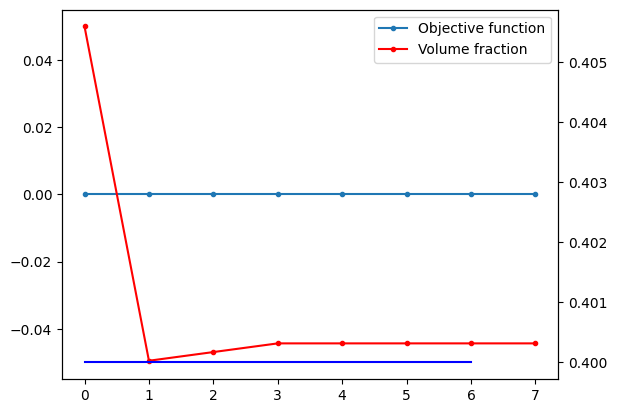

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(obj,label="Objective function",marker='.')
ax2.plot(frac,label='Volume fraction',marker='.',color='r')
ax2.plot([0,6],[0.4,0.4],color='b')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2)

In [32]:
def TwoSquareMeshQ2(nelx_1,nely_1,left,right,wid,spa):
    nelx = nelx_1*2
    nely = nely_1*2
    dy = 1/nely
    dx = dy
    nnode = (nelx+1)*(nely+1)
    Node = np.zeros((nnode,2))
    x = 0
    for i in range(nelx+1):
        y = 0
        for j in range(nely+1):
            ind = i*(nely+1)+j
            Node[ind,:] = np.array([x,y])
            y = y+dy
        x = x+dx
    elmN = nelx_1*nely_1
    conec = np.zeros((elmN,9))
    ind = 0
    for j in range(nelx):
        if j%2==0:
            for k in range(nely+1):
                if k%2==0 and k%(nely+1)!=nely:
                    i = j*(nely+1)+k
                    conec[ind,:] = i,int(i+2*nely+2),int(i+2*nely+4),int(i+2),int(i+nely+1),int(i+2*nely+3),int(i+nely+3),int(i+1),int(i+nely+2)
                    ind = ind+1
    Element = conec.astype(int)
    NodeBC = TwoBoundaryCndQ2(nelx_1,nely_1,Node,left,right,wid,spa)
    return Node,Element,NodeBC

In [7]:
def TwoSquareMeshQ1(nelx,nely,left,right,wid,spa):
    dy = 1/nely
    dx = dy
    nnode = (nelx+1)*(nely+1)
    Node = np.zeros((nnode,2))
    x = 0
    for i in range(nelx+1):
        y = 0
        for j in range(nely+1):
            ind = i*(nely+1)+j
            Node[ind,:] = np.array([x,y])
            y = y+dy
        x = x+dx
    elmN = nelx*nely
    conec = np.zeros((elmN,4))
    ind = 0
    for i in range((nely+1)*nelx):
        if i%(nely+1)!=nely:
            conec[ind,:] = i,int(i+nely+1), int(i+nely+2), int(i+1)
            ind = ind+1
    Element = conec.astype(int)
    NodeBC = TwoBoundaryCndQ1(nelx,nely,Node,left,right,wid,spa)
    return Node,Element,NodeBC

In [100]:
def TwoBoundaryCndQ2(nelx_1,nely_1,Node,left,right,wid,spa):
    nelx = nelx_1*2
    nely = nely_1*2
    BC=[]
    for i in range(nelx-1):
        BC.append([(nely+1)*(i+1),0,0])
        BC.append([(nely+1)*(i+1),1,0])
        BC.append([(nely+1)*(i+1)+nely,0,0])
        BC.append([(nely+1)*(i+1)+nely,1,0])
    for i in range(nely+1):
        y_in = Node[i,1]
        if y_in>=left-wid and y_in<=left:
            v_in = 1-((2/wid)**2)*((y_in-(left-wid/2))**2)
        elif y_in>=left-spa-wid*2 and y_in<=left-spa-wid:
            v_in = 1-((2/wid)**2)*((y_in-(left-spa-3*wid/2))**2)
        else:
            v_in=0
        BC.append([i,0,v_in])
        BC.append([i,1,0])
        y_out = Node[(nely+1)*nelx+i,1]
        if y_out>=right-wid and y_out<=right:
            v_out = 1-((2/wid)**2)*((y_out-(right-wid/2))**2)
        elif y_out>=right-spa-wid*2 and y_out<=right-spa-wid:
            v_out = 1-((2/wid)**2)*((y_out-(right-spa-3*wid/2))**2)
        else:
            v_out=0
        BC.append([(nely+1)*nelx+i,0,v_out])
        BC.append([(nely+1)*nelx+i,1,0])
    BC.sort()
    NodeBC = np.array(BC)
    return NodeBC

In [9]:
def TwoBoundaryCndQ1(nelx,nely,Node,left,right,wid,spa):
    BC=[]
    for i in range(nely+1):
        y_out = Node[(nely+1)*nelx+i,1]
        if y_out>=right-wid and y_out<=right:
            p_out = 0
            BC.append([(nely+1)*nelx+i,0,p_out])
        elif y_out>=right-spa-wid*2 and y_out<=right-spa-wid:
            p_out = 0
            BC.append([(nely+1)*nelx+i,0,p_out])
        else:
            continue
    BC.sort()
    NodeBC = np.array(BC)
    return NodeBC

In [48]:
p,f,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,zIni)

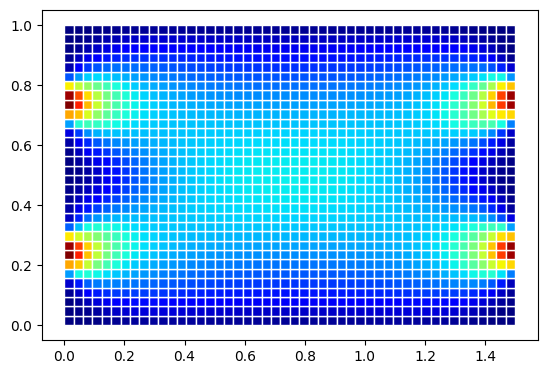

In [49]:
Q2Q1FEM.Plot_patch(32,Node_P,Element_P,(np.sqrt(u**2+v**2)),max(np.sqrt(u**2+v**2)),min(np.sqrt(u**2+v**2)),cmap='jet')

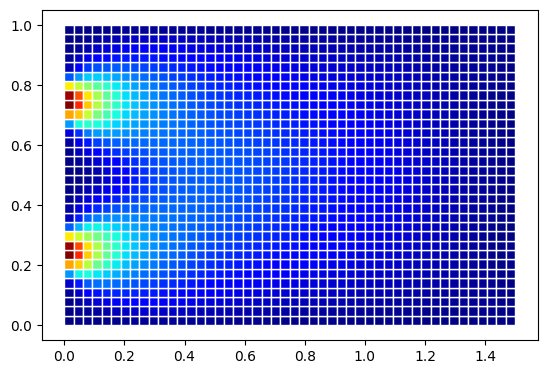

In [52]:
p,f,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,zIni)
Q2Q1FEM.Plot_patch(32,Node_P,Element_P,(np.sqrt(u**2+v**2)),max(np.sqrt(u**2+v**2)),min(np.sqrt(u**2+v**2)),cmap='jet')

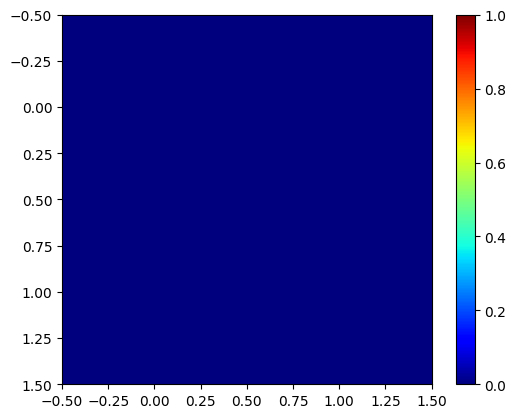

In [111]:
plt.imshow(np.zeros(4).reshape(2,2),vmin=0,vmax=1,cmap='jet')
plt.colorbar()

In [17]:
# Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u_ryo**2+v_ryo**2)),1,0,cmap='jet')
# Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(p_ryo),1,0,cmap='jet')